In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

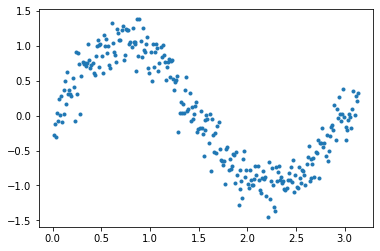

In [3]:
testing_data = pd.read_csv('testRegression.csv')
training_data = pd.read_csv('trainRegression.csv')
x = np.array(training_data['X'])
r = np.array(training_data['R'])
plt.plot(x, r,'.')

In [4]:
 def linear_model(x,r):
    A = np.array([
        [ x.size  , x.sum()     ],
        [ x.sum() , (x*x).sum() ]
    ])
    B = np.array([
        [ r.sum()     ],
        [ (r*x).sum() ]
    ])
    return A,B

In [5]:
 def quadratic_model(x,r):
    A = np.array([
        [ x.size      , x.sum()       , (x*x).sum()     ],
        [ x.sum()     , (x*x).sum()   , (x*x*x).sum()   ],
        [ (x*x).sum() , (x*x*x).sum() , (x*x*x*x).sum() ]
    ])
    B = np.array([
        [ r.sum()       ],
        [ (r*x).sum()   ],
        [ (r*x*x).sum() ]
    ])
    return A,B

In [6]:
def cubic_model(x,r):
    A = np.array([
        [ x.size        , x.sum()         , (x*x).sum()       , (x*x*x).sum()       ],
        [ x.sum()       , (x*x).sum()     , (x*x*x).sum()     , (x*x*x*x).sum()     ],
        [ (x*x).sum()   , (x*x*x).sum()   , (x*x*x*x).sum()   , (x*x*x*x*x).sum()   ],
        [ (x*x*x).sum() , (x*x*x*x).sum() , (x*x*x*x*x).sum() , (x*x*x*x*x*x).sum() ]
    ])
    B = np.array([
        [ r.sum()        ],
        [ (r*x).sum()    ],
        [ (r*x*x).sum()  ],
        [ (r*x*x*x).sum()]
    ])
    return A,B       

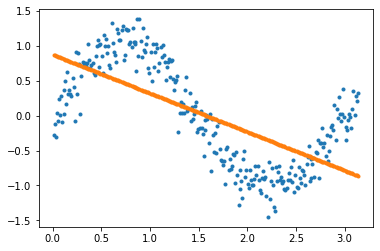

In [7]:
A,B = linear_model(x,r)
inverse_A = np.linalg.inv(A)
linear_theeta = np.dot(inverse_A, B)
linear_prediction = linear_theeta[0] + np.multiply(x, linear_theeta[1])
plt.plot(x,r,'.')
plt.plot(x, linear_prediction,'.')
plt.show()

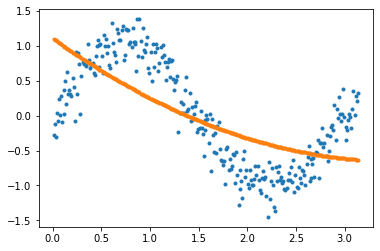

In [8]:
A,B = quadratic_model(x,r)
quad_inverse_A = np.linalg.inv(A)
quad_theeta = np.dot(quad_inverse_A, B)
quad_prediction = quad_theeta[0]+np.multiply(quad_theeta[1],x)+np.multiply(quad_theeta[2],np.power(x,2))
plt.plot(x,r,'.')
plt.plot(x, quad_prediction,'.')
plt.show()

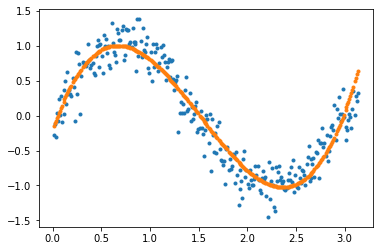

In [9]:
A,B = cubic_model(x,r)
cubic_inverse_A = np.linalg.inv(A)
cubic_theeta = np.dot(cubic_inverse_A, B)
cubic_prediction = cubic_theeta[0]+np.multiply(cubic_theeta[1],x)+np.multiply(cubic_theeta[2],np.power(x,2))+np.multiply(cubic_theeta[3],np.power(x,3))
plt.plot(x,r,'.')
plt.plot(x, cubic_prediction,'.')
plt.show()

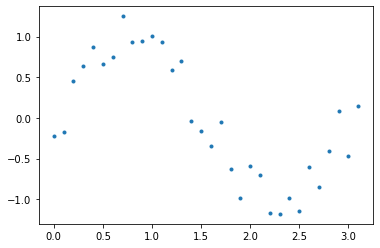

In [10]:
N = len(x)
testing_x = np.array(testing_data['X'])
testing_r = np.array(testing_data['R'])
plt.plot(testing_x,testing_r,'.')

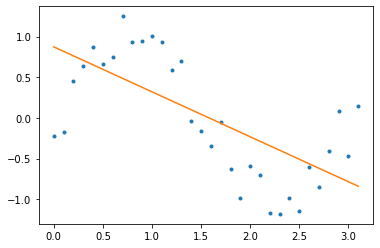

Linear Mean Square Error:
0.017861889585638304


In [14]:
linear_prediction_testing = linear_theeta[0] + np.multiply(testing_x, linear_theeta[1])
linear_prediction_mean_square_error = sum(np.square(testing_r-linear_prediction_testing))/(2*N)
plt.plot(testing_x,testing_r,'.')
plt.plot(testing_x, linear_prediction_testing)
plt.show()
print("Linear Mean Square Error:")
print(linear_prediction_mean_square_error)

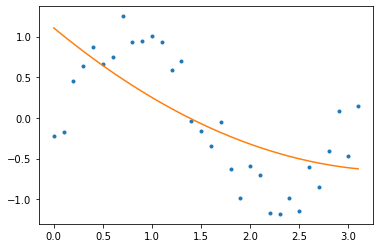

Quadratic Mean Square Error:
0.01843345842824755


In [15]:
quad_prediction_testing = quad_theeta[0]+np.multiply(quad_theeta[1],testing_x)+np.multiply(quad_theeta[2],np.power(testing_x,2))
quad_prediction_mean_square_error = sum(np.square(testing_r-quad_prediction_testing))/(2*N)
plt.plot(testing_x,testing_r,'.')
plt.plot(testing_x,quad_prediction_testing)
plt.show()
print("Quadratic Mean Square Error:")
print(quad_prediction_mean_square_error)

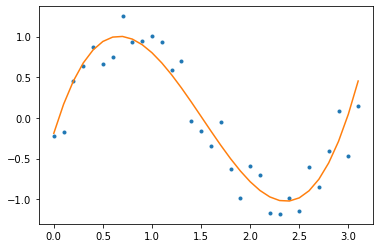

Cubic Mean Square Error:
0.0029140385973685577


In [17]:
cubic_prediction_testing = cubic_theeta[0]+np.multiply(cubic_theeta[1],testing_x)+np.multiply(cubic_theeta[2],np.power(testing_x,2))+np.multiply(cubic_theeta[3],np.power(testing_x,3))
cubic_prediction_mean_square_error = sum(np.square(testing_r-cubic_prediction_testing))/(2*N)
plt.plot(testing_x,testing_r,'.')
plt.plot(testing_x,cubic_prediction_testing)
plt.show()
print("Cubic Mean Square Error:")
print(cubic_prediction_mean_square_error)

# Comments

As we can see from the graph on the training and testing data. The mean square error for the cubic prediction is the lowest among all three and thus it is best for the testing of data.